In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[*********************100%***********************]  1 of 1 completed


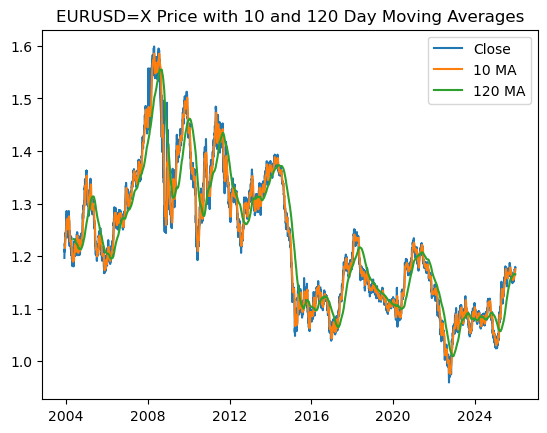

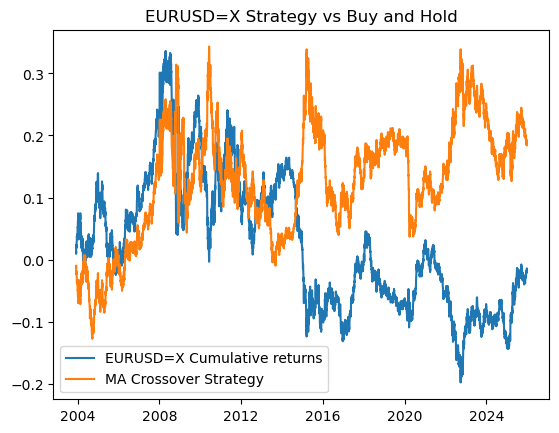

Price,Close,High,Low,Open,Volume,10_ma,120_ma,strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,,
2004-05-14,1.188199,1.189400,1.178898,1.180401,0,1.194760,1.232517,-1.0,-0.006939,0.000019
2004-05-17,1.202501,1.205894,1.188199,1.189499,0,1.195650,1.232567,-1.0,0.005014,-0.012018
2004-05-18,1.194501,1.203804,1.193602,1.202400,0,1.194050,1.232447,-1.0,-0.001672,-0.005445
2004-05-19,1.200394,1.203905,1.194401,1.194401,0,1.192500,1.232348,-1.0,0.003253,-0.010351
2004-05-20,1.195700,1.201403,1.190094,1.200394,0,1.191300,1.232245,-1.0,-0.000670,-0.006482
...,...,...,...,...,...,...,...,...,...,...
2025-12-19,1.172567,1.173750,1.170412,1.172539,0,1.170604,1.165470,1.0,-0.020004,0.185745
2025-12-22,1.170809,1.177024,1.171084,1.171084,0,1.171283,1.165410,1.0,-0.021473,0.183968
2025-12-23,1.176595,1.180359,1.176429,1.176443,0,1.172528,1.165434,1.0,-0.016637,0.189819


In [59]:
ticker = "EURUSD=X"
FAST = 10
SLOW = 120
LOOKBACK = -10000

def get_data():
    df = yf.download(ticker, period = '30y', auto_adjust=True, interval='1d')
    df.sort_index(inplace=True)
    df.columns = df.columns.get_level_values(0)

    return df.iloc[LOOKBACK:,:]
 
def add_moving_average(df, Fast, Slow):
    df[f'{Fast}_ma'] = df['Close'].rolling(Fast).mean()
    df[f'{Slow}_ma'] = df["Close"].rolling(Slow).mean()

    plt.plot(df['Close'])
    plt.plot(df[f'{FAST}_ma'])
    plt.plot(df[f'{SLOW}_ma'])

    plt.legend(['Close', f'{FAST} MA', f'{SLOW} MA'])
    plt.title(f'{ticker} Price with {FAST} and {SLOW} Day Moving Averages')
    plt.show()

    return df

def add_strategy(df, Fast, Slow):
    df['strategy'] = np.where(df[f'{Fast}_ma'] > df[f'{Slow}_ma'], 1, -1)
    df['strategy'] = df['strategy'].shift(1) #shift to avoid lookahead bias
    return df

def test_strategy(df):
    df['asset_cumulative'] = (1 + df["Close"].pct_change()).cumprod() -1 #benchmark
    df['strategy_cumulative'] = (1 + df["Close"].pct_change() * df['strategy']).cumprod() -1


    plt.figure()
    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])

    plt.legend([f'{ticker} Cumulative returns', 'MA Crossover Strategy'])
    plt.title(f'{ticker} Strategy vs Buy and Hold')
    plt.show()

    return df.dropna().copy()

df = get_data()
df = add_moving_average(df, FAST, SLOW)
df = add_strategy(df, FAST, SLOW)
df = test_strategy(df)
df